# INIT

## Import and load the original data

In [1]:
import sys
sys.path.insert(1, '../') 
from utils.loader import Loader
from utils.data_processor import Data_processor
from utils.evaluator import Evaluator

from sklearn.metrics import mean_absolute_error, r2_score, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score, log_loss

import pandas as pd
from sklearn import tree
import os
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVC, SVR
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeRegressor
from sklearn.feature_selection import chi2
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.naive_bayes import GaussianNB
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import prince
import numpy as np

2024-11-16 14:54:34.107127: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1731765274.118929   94341 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1731765274.122570   94341 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-11-16 14:54:34.135950: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
data = Loader.load_by_fueltype("Eléctrico")
label_encoder = LabelEncoder()
data["price_categ"].value_counts()

/home/liingfeng/Desktop/repos/Cars_Price_Prediction/Trees/../utils/loader.py:153: DtypeWarning: Columns (120) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path,
/home/liingfeng/Desktop/repos/Cars_Price_Prediction/Trees/../utils/loader.py:153: DtypeWarning: Columns (120) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path,
/home/liingfeng/Desktop/repos/Cars_Price_Prediction/Trees/../utils/loader.py:165: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on t

price_categ
Middle low range     1353
Luxury               1182
Premiun              1113
Middle range          820
High end              767
Middle high range     727
Budget                483
Low end               141
Very low end            5
Name: count, dtype: int64

### Describe some columns
A more detailed version of the dataset can be found in the DataDescription.ipynb

In [3]:
data.select_dtypes(include=['category'])

,color,brand,model,version,fuelType,bodyTypeId,transmissionTypeId,province,environmentalLabel,jato_classification,...,Acabado Exterior_Pintura,Acabado Exterior_Rueda,AC_Zones,AC_Type,Metodo_Apertura,Tipo_Faro,interior_clock,arm_suppport_front,arm_suppport_back,price_categ
idx,,,,,,,,,,,,,,,,,,,,,
118216,Verde,DACIA,Spring,Expression Electric 33kW 45CV,Eléctrico,Berlina,Automatico,Pontevedra,0,L1,...,pintura solida,rueda repuesto llanta acero menor tamaño resto,MONOZONA,STANDARD,Mando a distancia,Otro,no tiene,no tiene,no tiene,Middle low range
118241,Azul,VOLKSWAGEN,Golf,eGolf ePower 115CV,Eléctrico,Berlina,Automatico,Álava,0,M1,...,pintura solida,no tiene,BIZONA,AUTO,Mando a distancia,LED,no tiene,Tiene,Tiene,Budget
118337,Blanco,VOLKSWAGEN,Golf,eGolf ePower 100 kW 136CV,Eléctrico,Berlina,Automatico,Málaga,NaN,M1,...,pintura solida,no tiene,BIZONA,AUTO,Mando a distancia,LED,no tiene,Tiene,Tiene,Middle low range
118638,Verde,DACIA,Spring,Expression Electric 33kW 45CV,Eléctrico,Berlina,Automatico,Pontevedra,0,L1,...,pintura solida,rueda repuesto llanta acero menor tamaño resto,MONOZONA,STANDARD,Mando a distancia,Otro,no tiene,no tiene,no tiene,Middle low range
118656,Gris / Plata,FIAT,500,Icon Hb 320km 85kW 118CV,Eléctrico,Berlina,Automatico,Madrid,NaN,M2,...,pintura solida,no tiene,MONOZONA,AUTO,Tarjeta/llave inteligente,Otro,no tiene,no tiene,no tiene,Middle low range
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46869,Azul (Pintura metalizada),VOLKSWAGEN,Golf,eGolf ePower 100 kW 136CV,Eléctrico,Berlina,Automatico,Madrid,0,M1,...,pintura solida,no tiene,BIZONA,AUTO,Mando a distancia,LED,no tiene,Tiene,Tiene,Middle low range
46965,Blanco (Blanco Puro),VOLKSWAGEN,Golf,eGolf ePower 100 kW 136CV,Eléctrico,Berlina,Automatico,Madrid,0,M1,...,pintura solida,no tiene,BIZONA,AUTO,Mando a distancia,LED,no tiene,Tiene,Tiene,Middle low range
46966,Gris / Plata (Gris Indy (metalizado)),VOLKSWAGEN,Golf,eGolf ePower 100 kW 136CV,Eléctrico,Berlina,Automatico,Madrid,0,M1,...,pintura solida,no tiene,BIZONA,AUTO,Mando a distancia,LED,no tiene,Tiene,Tiene,Middle low range


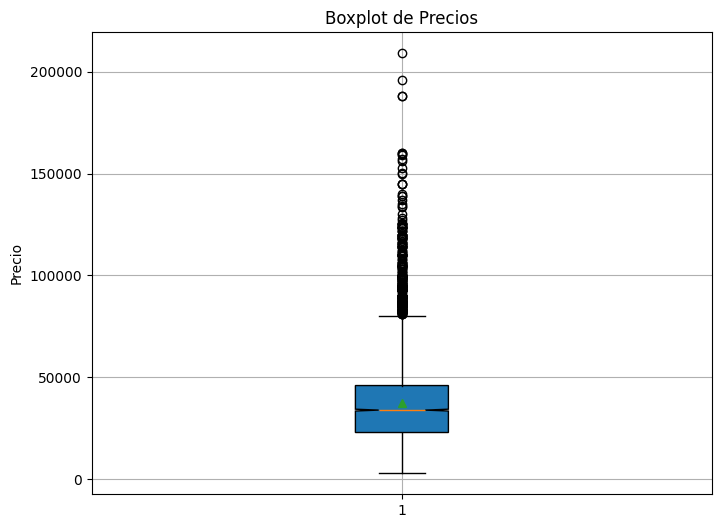

In [4]:
precios_electricos = data["price"]
plt.figure(figsize=(8, 6))
plt.boxplot(precios_electricos, notch=True, vert=True, patch_artist=True, showmeans=True)
plt.title('Boxplot de Precios')
plt.ylabel('Precio')
plt.grid(True)
plt.show()

The related outliers were checked manually throught the data source, and we could confirmed that they are not outliers

In [5]:
Q1 = data['price'].quantile(0.25)
Q2 = data['price'].quantile(0.5)  # Esta es la mediana
Q3 = data['price'].quantile(0.75)
IQR = Q3 - Q1

upper_whisker = (Q3 + 1.5 * IQR)
print(upper_whisker)

data[data["fuelType"] == "Eléctrico"][data["price"]>upper_whisker][["price", "brand"]].sort_values(by='price', ascending=False)

80525.0


,price,brand
idx,,
28269,209000,MASERATI
85726,196000,MASERATI
144182,188000,MERCEDES-BENZ
134773,188000,MERCEDES-BENZ
21981,159900,PORSCHE
...,...,...
1917,81400,MERCEDES-BENZ
28058,80900,AUDI
43135,80900,LEXUS


# Electric cars

## Numerical variables selection Eléctrico
Here we will perform PCA and use correlation matrix to select the most correlated numerical variables

In [6]:
def fill_electric_numerical_columns(numerical_columns: pd.DataFrame) -> pd.DataFrame:
    #fill the elemental columns that has a minor amount of missing data with the mode
    numerical_columns = Data_processor.fill_na_with_mode(numerical_columns, "dimensions.length")
    numerical_columns = Data_processor.fill_na_with_mode(numerical_columns, "dimensions.height")
    numerical_columns = Data_processor.fill_na_with_mode(numerical_columns, "electricFeatures.maximumBatteryKWH_kWh")
    numerical_columns = Data_processor.fill_na_with_mode(numerical_columns, "electricFeatures.onboardCharger_kW")
    numerical_columns = Data_processor.fill_na_with_mode(numerical_columns, "electricFeatures.range_KM")

    #fill the missing data witch regression, the parameters were based on the relation matrix 
    numerical_columns = Data_processor.impute_with_linear_regression(data=numerical_columns, x_columns=["dimensions.length", "dimensions.height"], y_column="dimensions.width")
    numerical_columns = Data_processor.impute_with_linear_regression(data=numerical_columns, x_columns=["dimensions.length", "dimensions.height", "dimensions.width"], y_column="trunkCapacityInLiters")
    numerical_columns = Data_processor.impute_with_linear_regression(data=numerical_columns, x_columns=["power_cv", "power_kw"], y_column="maxSpeed")
    numerical_columns = Data_processor.impute_with_linear_regression(data=numerical_columns, x_columns=["power_cv", "power_kw", "maxSpeed"], y_column="acceleration")
    numerical_columns = Data_processor.impute_with_linear_regression(data=numerical_columns, x_columns=["power_cv", "power_kw", "maxSpeed"], y_column="acceleration")
    numerical_columns = Data_processor.impute_with_linear_regression(data=numerical_columns, x_columns=["Llantas_Diametro_cm", "power_kw"], y_column="max_torque_nm")
    numerical_columns = Data_processor.impute_with_linear_regression(data=numerical_columns, x_columns=["electricFeatures.maximumBatteryKWH_kWh", "power_kw", "dimensions.length", "dimensions.height", "dimensions.width"], y_column="electricFeatures.combinedConsumption_kWh/")
    numerical_columns = Data_processor.impute_with_linear_regression(data=numerical_columns, x_columns=["electricFeatures.maximumBatteryKWH_kWh", "electricFeatures.combinedConsumption_kWh/", "power_kw"], y_column="electricFeatures.range_KM")
    numerical_columns.dropna(axis=1, inplace=True)
    return numerical_columns

def get_electric_numerical_columns (data: pd.DataFrame) -> pd.DataFrame:
    numerical_columns = data.select_dtypes(include=['number'])
    numerical_columns.drop(columns=[ "car_id", "electricFeatures.maxPower_CV"], inplace=True) # electricFeatures.maxPower_CV is = power_cv (Duplicated colums)

    #if all the values of the numerical columns is 0, we remove the column
    cols_to_drop = numerical_columns.columns[(numerical_columns == 0).all()]
    numerical_columns = numerical_columns.drop(cols_to_drop, axis=1)

    #Remove the column with all NAs
    max_nans = 6586
    thresh = numerical_columns.shape[0] - max_nans

    numerical_columns.dropna(axis=1, thresh=thresh+1, inplace=True)
    return fill_electric_numerical_columns(numerical_columns)

In [7]:
numerical_columns = get_electric_numerical_columns(data)

Regression mape ['dimensions.length', 'dimensions.height'] -> dimensions.width: 1.6468475373043991%
Regression mape ['dimensions.length', 'dimensions.height', 'dimensions.width'] -> trunkCapacityInLiters: 16.915082042969487%
Regression mape ['power_cv', 'power_kw'] -> maxSpeed: 5.68947357102893%
Regression mape ['power_cv', 'power_kw', 'maxSpeed'] -> acceleration: 13.035625391285716%
Regression mape ['power_cv', 'power_kw', 'maxSpeed'] -> acceleration: 11.85488371952157%
Regression mape ['Llantas_Diametro_cm', 'power_kw'] -> max_torque_nm: 17.854083487783605%
Regression mape ['electricFeatures.maximumBatteryKWH_kWh', 'power_kw', 'dimensions.length', 'dimensions.height', 'dimensions.width'] -> electricFeatures.combinedConsumption_kWh/: 17.20475510968712%
Regression mape ['electricFeatures.maximumBatteryKWH_kWh', 'electricFeatures.combinedConsumption_kWh/', 'power_kw'] -> electricFeatures.range_KM: 16.161382226819622%


In [8]:
correlation_matrix = numerical_columns.corr()["price"]
print(correlation_matrix)

price                                        1.000000
km                                          -0.343331
year                                         0.459700
doors                                        0.092279
seatingCapacity                              0.257532
trunkCapacityInLiters                        0.301739
maxSpeed                                     0.655830
acceleration                                -0.582307
power_cv                                     0.709338
power_kw                                     0.712126
max_torque_nm                                0.677488
speakers                                     0.294090
dimensions.width                             0.689372
dimensions.height                            0.055209
dimensions.length                            0.613427
Numero_Testigos                              0.183137
Llantas_Diametro_cm                          0.633856
electricFeatures.range_KM                    0.600411
electricFeatures.maximumBatt

In [9]:
scaler = StandardScaler()
df_scaled  = scaler.fit_transform(numerical_columns)

pca = PCA(n_components=2)
principal_components = pca.fit_transform(df_scaled)
df_pca = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])

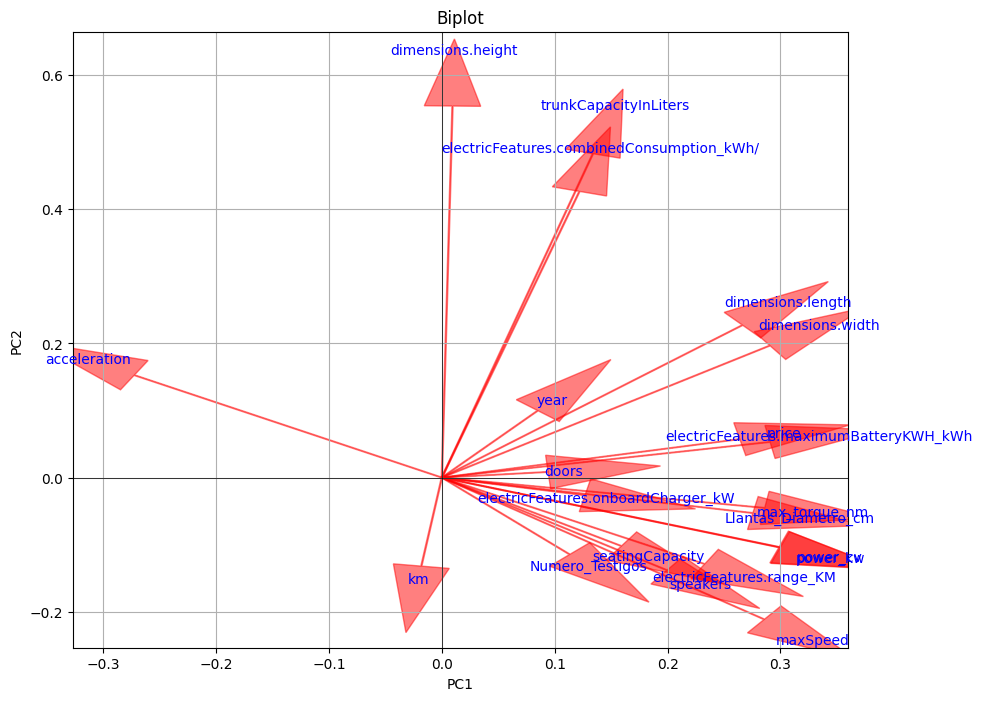

In [10]:
def biplot(score, coeff, labels=None):
    plt.figure(figsize=(10, 8))
    origin = [0, 0]  # Origen de las flechas

    # Dibujar las flechas
    for i in range(len(coeff)):
        plt.arrow(origin[0], origin[1], coeff[i,0], coeff[i,1], color='r', alpha=0.5, head_width=0.05, head_length=0.1)
        if labels is not None:
            plt.text(coeff[i,0]*1.15, coeff[i,1]*1.15, labels[i], color='blue', ha='center', va='center')

    plt.xlabel("PC1")
    plt.ylabel("PC2")
    plt.title("Biplot")
    plt.grid(True)
    plt.axhline(0, color='black',linewidth=0.5)
    plt.axvline(0, color='black',linewidth=0.5)
    plt.xlim(min(coeff[:,0])*1.2, max(coeff[:,0])*1.2)
    plt.ylim(min(coeff[:,1])*1.2, max(coeff[:,1])*1.2)
    plt.show()

# Llamada a la función biplot
biplot(principal_components, np.transpose(pca.components_[0:2, :]), labels=numerical_columns.columns)

## Test CART regression trees with only numerical variables

In [11]:
X = numerical_columns.drop(columns="price")
y = numerical_columns["price"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

tree_model = DecisionTreeRegressor(random_state=42)
tree_model.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

MAE: 3409.4297823911006 
 MSE: 38925318.27213024 
 RMSE: 6239.015809575277 
 R2: 0.9093525348184156 
 MAPE: 9.63795849628378
Mean: 3409.4297823911006
Variance: 27301106.831074815
Standard Deviation: 5225.046108033384


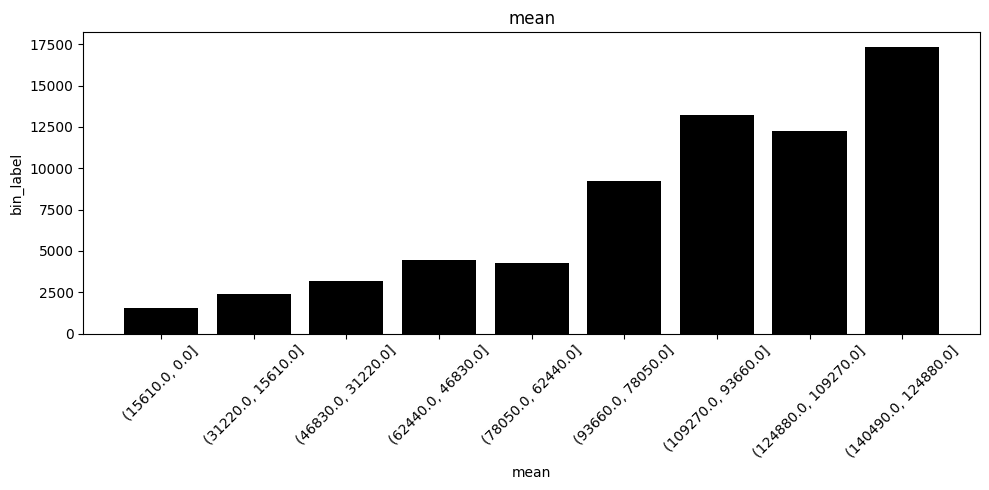

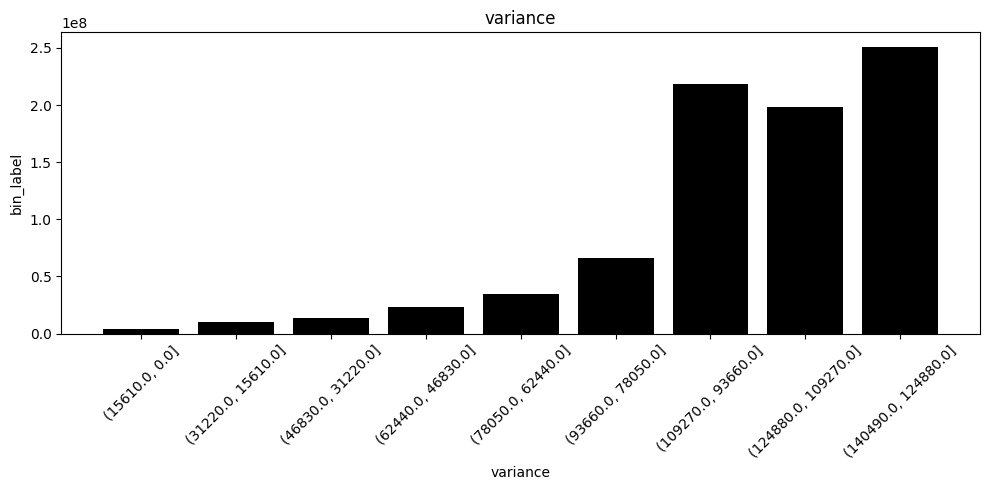

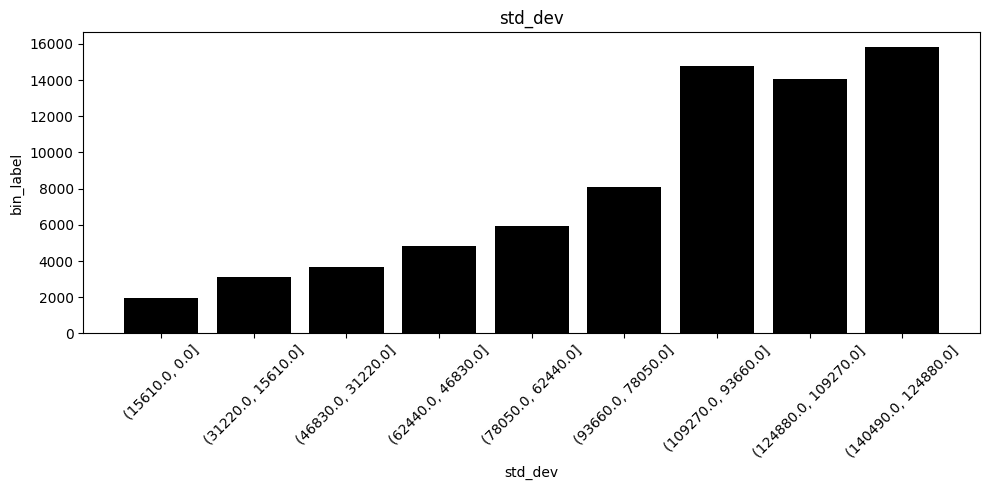

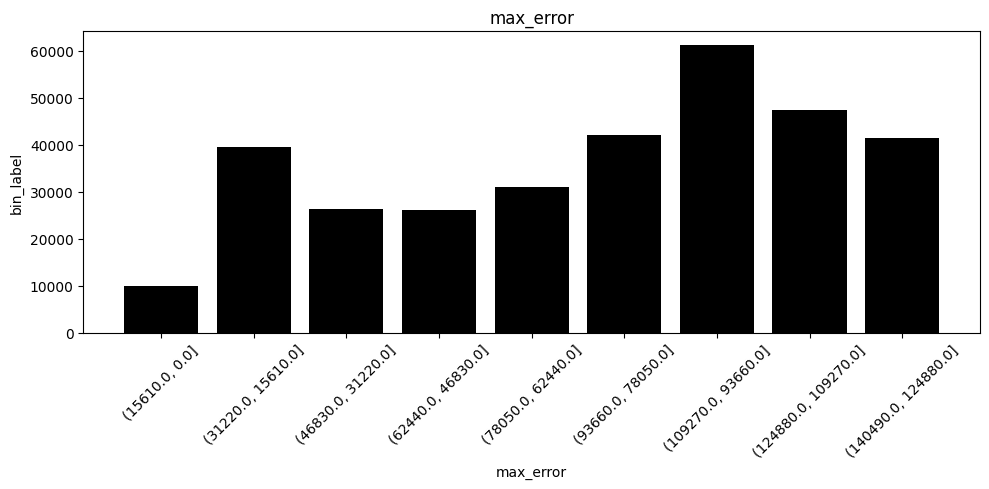

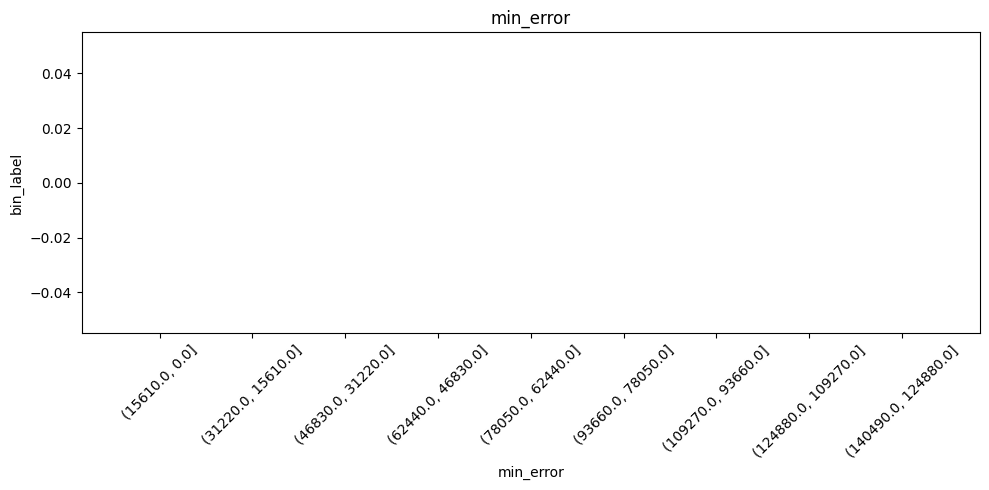

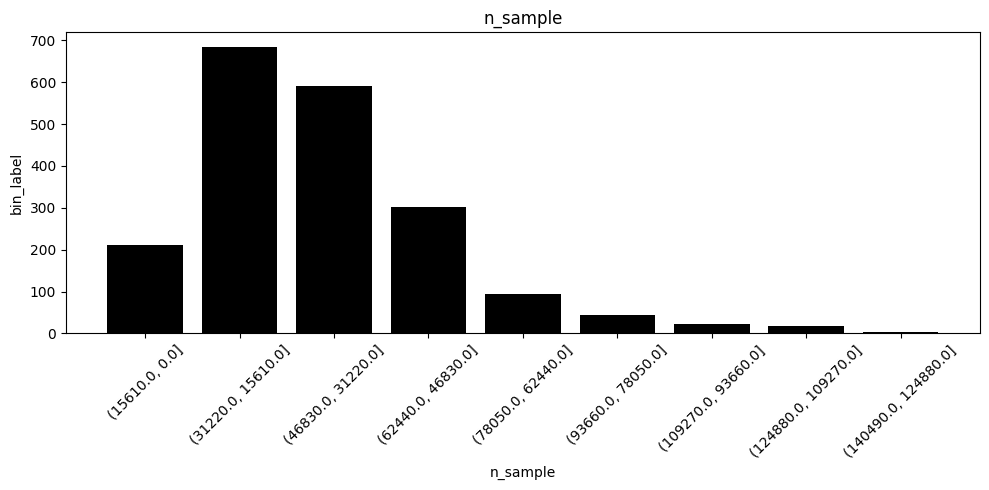

,bin_label,mean,variance,std_dev,max_error,min_error,n_sample
0,"(15610.0, 0.0]",1535.303318,3.734700e+06,1932.537137,9990.0,0.0,211
1,"(31220.0, 15610.0]",2385.763386,9.816007e+06,3133.050720,39511.0,0.0,685
2,"(46830.0, 31220.0]",3210.501190,1.362237e+07,3690.849924,26291.0,0.0,592
3,"(62440.0, 46830.0]",4442.791667,2.350241e+07,4847.928267,26005.0,0.0,302
4,"(78050.0, 62440.0]",4260.440909,3.499858e+07,5915.959521,30915.0,0.0,94
5,"(93660.0, 78050.0]",9234.821270,6.577893e+07,8110.421322,42010.0,0.0,45
6,"(109270.0, 93660.0]",13239.869565,2.182795e+08,14774.286677,61100.0,0.0,23
7,"(124880.0, 109270.0]",12241.277778,1.978943e+08,14067.490848,47400.0,0.0,18
8,"(140490.0, 124880.0]",17352.500000,2.511133e+08,15846.553845,41510.0,0.0,4


In [12]:
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# Realizar predicciones sobre el conjunto de prueba
y_pred = tree_model.predict(X_test)

Evaluator.eval_regression(y_pred, y_test, plot= True, bins=10)

## Electrico categorical variables
Here we will perform CA and Chi2 test to select the best categorical variables

In [13]:
def get_electric_categorical_columns(df: pd.DataFrame) -> pd.DataFrame:
    ret = df.select_dtypes(include=['category'])
    ret = ret.drop(columns=["environmentalLabel"]) #All of the cars of this dataframes are electrical which implies 0 emission
    ret = Data_processor.remove_redundand_columns(ret)
    ret = Data_processor.impute_categorical_mode(df=ret, X=["brand", "model"], Y="version")
    ret = Data_processor.impute_categorical_mode(df=ret, X=["brand", "model"], Y="jato_classification")
    ret = Data_processor.impute_categorical_mode(df=ret, X=["brand", "model", "traction"], Y="brakes")
    ret = Data_processor.impute_categorical_mode(df=ret, X=["brand", "model", "traction","brakes"], Y="front_suspension")
    ret = Data_processor.impute_categorical_mode(df=ret, X=["brand", "model", "traction","brakes"], Y="rear_suspension")
    return ret

In [14]:
categorical_columns = get_electric_categorical_columns(data)
print("\nCategorical Columns Index:")
print(categorical_columns.index)


Categorical Columns Index:
Index([118216, 118241, 118337, 118638, 118656, 118657, 118659, 118665, 118675,
       118704,
       ...
        46372,  46386,  46402,  46455,  46580,  46869,  46965,  46966,  46988,
        47192],
      dtype='int64', name='idx', length=6591)


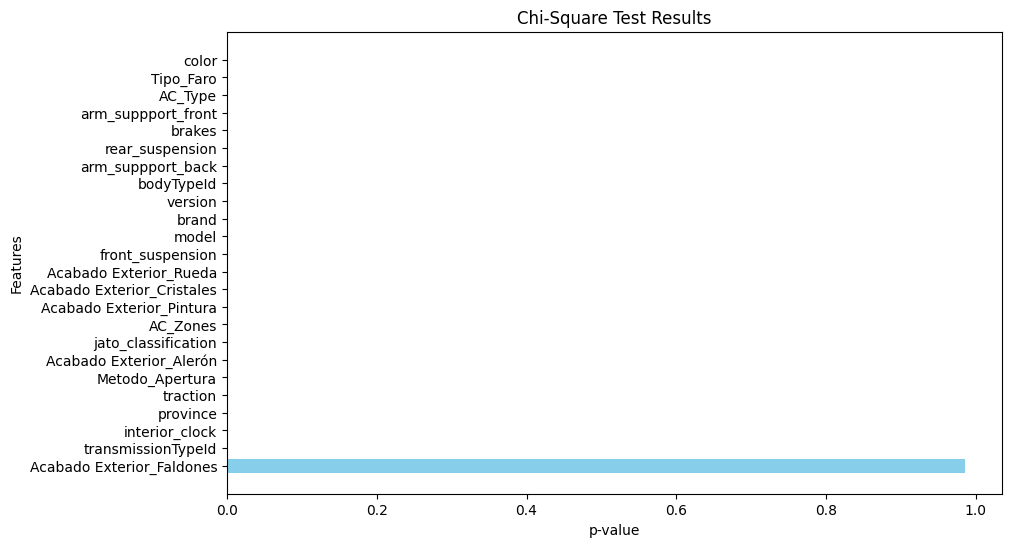

,Feature,Chi2 Stat,p-value
0,color,17355.917738,0.000000e+00
20,Tipo_Faro,1590.069687,0.000000e+00
18,AC_Type,1486.737498,0.000000e+00
22,arm_suppport_front,3759.181818,0.000000e+00
9,brakes,1581.335781,0.000000e+00
11,rear_suspension,1848.387572,0.000000e+00
23,arm_suppport_back,2401.453330,0.000000e+00
4,bodyTypeId,6530.816750,0.000000e+00
3,version,19903.204434,0.000000e+00
1,brand,1800.198086,0.000000e+00


In [15]:
Data_processor.chi_square_test(categorical_columns=categorical_columns, column_y="price_categ")

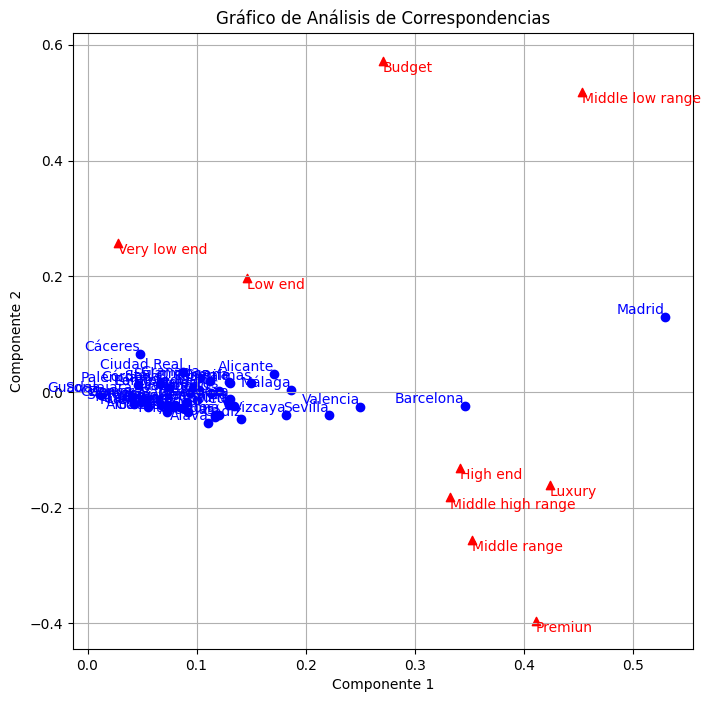

In [16]:
Data_processor.CA(categorical_columns=categorical_columns, col_x="province", col_y="price_categ")

In [17]:
categorical_columns["price_categ"].value_counts()

price_categ
Middle low range     1353
Luxury               1182
Premiun              1113
Middle range          820
High end              767
Middle high range     727
Budget                483
Low end               141
Very low end            5
Name: count, dtype: int64

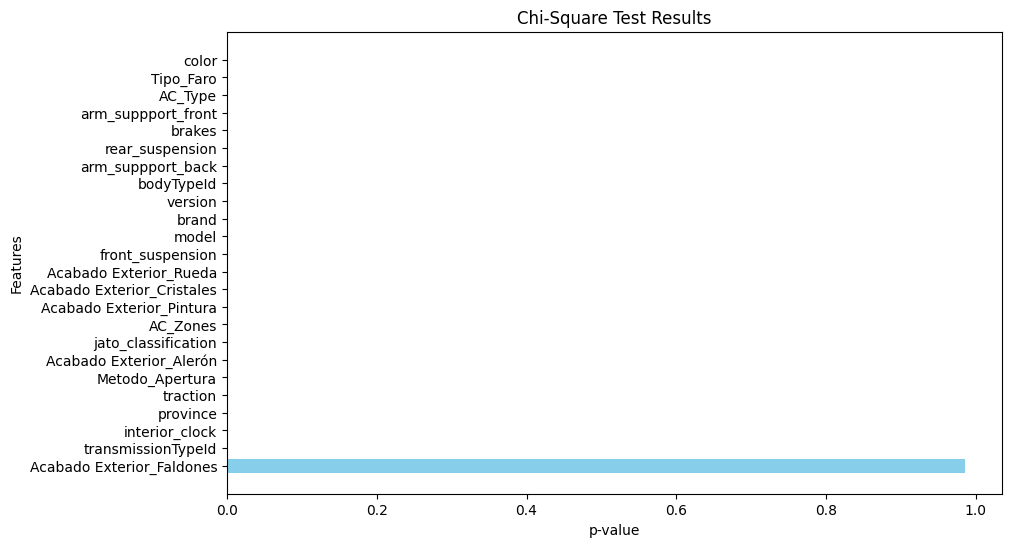

Index(['color', 'Tipo_Faro', 'AC_Type', 'arm_suppport_front', 'brakes',
       'rear_suspension', 'arm_suppport_back', 'bodyTypeId', 'version',
       'brand', 'model', 'price_categ'],
      dtype='object')

In [18]:
categorical_columns = Data_processor.chi_square_filter(categorical_columns, "price_categ", p_value_filter=0)
categorical_columns.columns

## Test CART tree classifier with only categorical values

In [19]:
features_df = pd.get_dummies(categorical_columns.drop('price_categ', axis=1))

# Your target variable
target = categorical_columns['price_categ'].apply(Loader.encode_price_categ)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features_df, target, test_size=0.3, random_state=42)

# Initialize and train the Decision Tree Classifier
cart_model = DecisionTreeClassifier(random_state=42)
cart_model.fit(X_train, y_train)

# Predicting the test set results
y_pred = cart_model.predict(X_test)


In [20]:
result = pd.DataFrame({"Real_Categorie": y_test, "Prediction": y_pred})
result["diff"] = np.abs(result["Real_Categorie"].astype(int) - result["Prediction"])
result["Real_Categorie"] = result["Real_Categorie"].apply(Loader.decode_price_categ)
result["Prediction"] = result["Prediction"].apply(Loader.decode_price_categ)
result

,Real_Categorie,Prediction,diff
idx,,,
110061,Budget,Budget,0
34731,Middle range,Middle range,0
58032,Budget,Middle low range,1
7755,Premiun,Premiun,0
152527,Middle low range,Budget,1
...,...,...,...
151606,Middle high range,Budget,2
134374,High end,High end,0
20786,Luxury,Luxury,0


In [21]:
# Calcular la precisión
Evaluator.eval_classfication(y_pred=result["Prediction"].to_numpy(), y_true=result["Real_Categorie"].to_numpy(), binary_classification=False)

Accuracy: 0.6238624873609707 
 Precision: 0.6281314029814095 
 Recall: 0.6238624873609707 
 F1 Score: 0.6239559047767533
Confusion Matrix:
 [[315   2   0   0  13  41  43   1   0]
 [  3 105   0  10  30   0  25  53   0]
 [  0   0  28   0   0  12   1   0   1]
 [  0   8   0 271  11   0   1  87   0]
 [ 20  34   0   2  80   1  53  13   0]
 [ 35   0  22   0   0  88   1   0   0]
 [ 64   9   0   1  41   2 131   1   0]
 [  2  46   0  38  12   0   4 216   0]
 [  0   0   1   0   0   0   0   0   0]]


We can verify that the prediction is not very accurate but we need to know how big is the error.

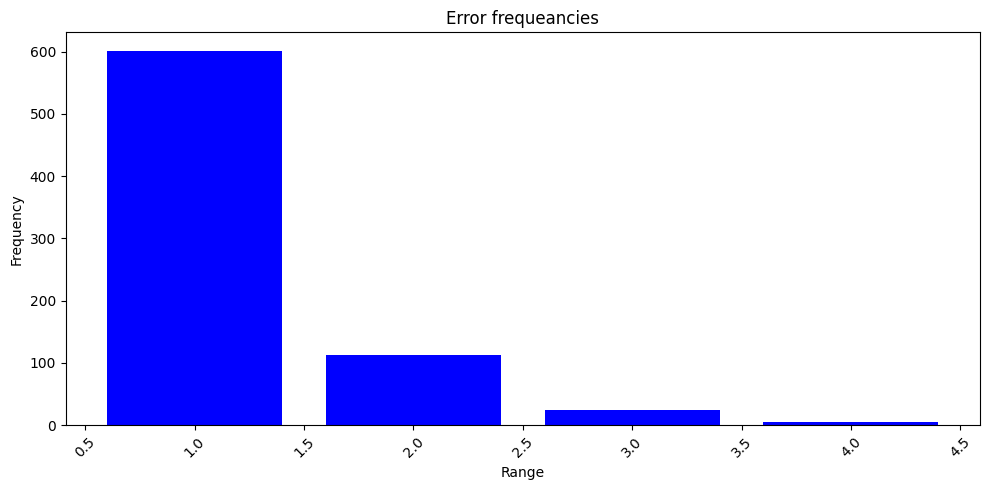

{1: 601, 2: 113, 3: 25, 4: 5}
Error mean: 1.239247311827957
Error rate: 37.613751263902934 %
Overall mean: 0.4661274014155713


In [22]:
Evaluator.eval_ordinal_classification (result["diff"])

Even having errors, we can verify that the errors are not that big

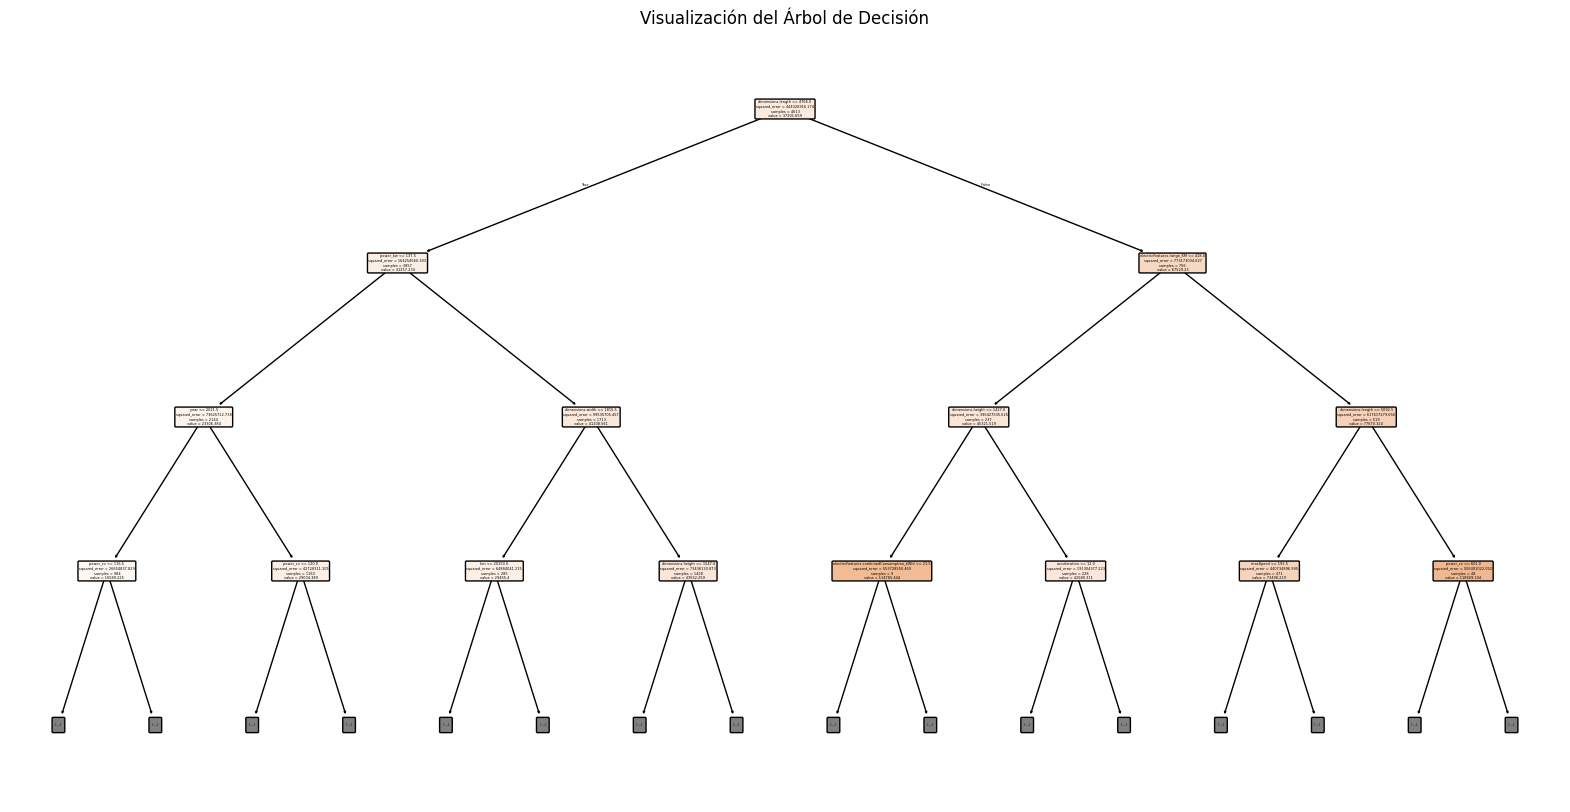

In [23]:
plt.figure(figsize=(20,10))

# Dibujar el árbol de decisión
plot_tree(tree_model, 
          filled=True, 
          rounded=True, 
          class_names=X_train.columns, 
          feature_names=X.columns, 
          max_depth=3)  # Puedes ajustar la profundidad para una mejor visualización o quitar este parámetro para mostrar todo el árbol
plt.title('Visualización del Árbol de Decisión')
plt.show()

# Agorithms evaluation

In [24]:
electric_cars = pd.merge(numerical_columns, categorical_columns, left_index=True, right_index=True, how='inner')
numerical_column_names = list(numerical_columns.columns)
categorical_column_names = list(categorical_columns.columns)

target = electric_cars[["price", "price_categ"]]
electric_cars.drop(columns=["price", "price_categ"], inplace=True)


numerical_column_names.remove("price")
categorical_column_names.remove("price_categ")

encoders_and_scalers = {}
for column in numerical_column_names:
    scaler = StandardScaler()
    electric_cars[[column]] = scaler.fit_transform(electric_cars[[column]])
    encoders_and_scalers[column] = scaler 

electric_cars_encoded = pd.get_dummies(electric_cars, columns=categorical_column_names)

## Classification

In [25]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(electric_cars_encoded, target['price_categ'], test_size=0.3, random_state=42)

In [26]:
def eval_classification(y_test, y_pred):
    result = pd.DataFrame({"Real": y_test, "Prediction": y_pred})
    result["diff"] = result["Real"].apply(Loader.encode_price_categ).to_numpy() - result["Prediction"].apply(Loader.encode_price_categ).to_numpy()
    Evaluator.eval_ordinal_classification(diff=result["diff"])

def classify(X_train, X_test, y_train, y_test , classifier, classifier_name = None) -> None:
    classifier = classifier
    classifier.fit(X_train, y_train)

    # Predicting the test set results
    y_pred = classifier.predict(X_test)
    eval_classification(y_test, y_pred)

    if classifier_name != None:
        return Evaluator.eval_classfication(y_pred = y_pred, y_true=y_test, binary_classification=False, classifier_name=classifier_name)
    return Evaluator.eval_classfication(y_pred = y_pred, y_true=y_test, binary_classification=False)



### CART

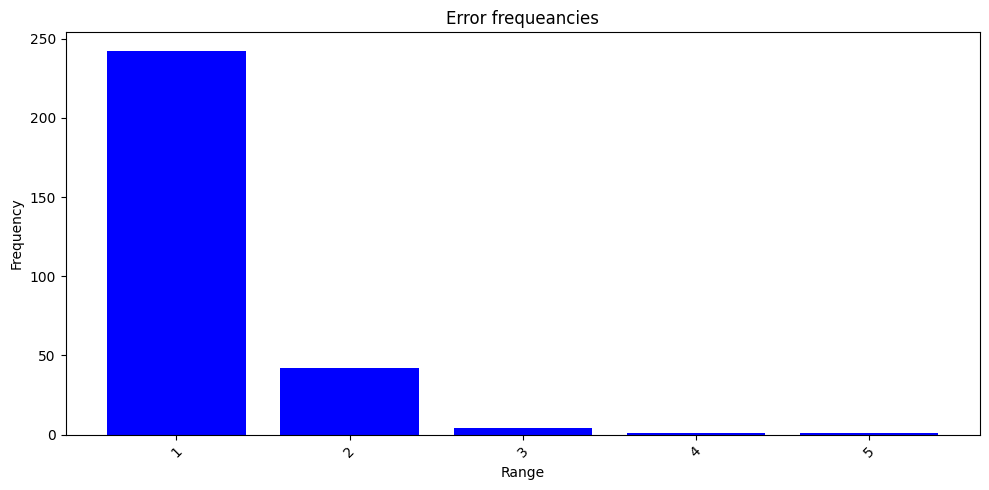

{1: 242, 2: 42, 3: 4, 4: 1, 5: 1}
Error mean: 1.196551724137931
Error rate: 14.661274014155712 %
Overall mean: -0.004044489383215369
Accuracy: 0.698685540950455 
 Precision: 0.7011434956900159 
 Recall: 0.698685540950455 
 F1 Score: 0.6993577416397256
Confusion Matrix:
 [[111   0   9   0   0  26   0   0   0]
 [  0 134   1   5  27   1  13  45   0]
 [ 12   0  22   0   0   7   0   0   1]
 [  0   5   0 320   0   0   0  53   0]
 [  0  50   0   1  93  12  41   6   0]
 [ 18   2   2   0  13 329  51   0   0]
 [  1   9   1   0  42  41 154   1   0]
 [  0  52   0  35   9   1   2 219   0]
 [  1   0   0   0   0   0   0   0   0]]


In [27]:
classify(X_train, X_test, y_train, y_test, DecisionTreeClassifier(random_state=42), classifier_name="CART")

### Random forest
Random forest can get a better result at a higher computational time cost

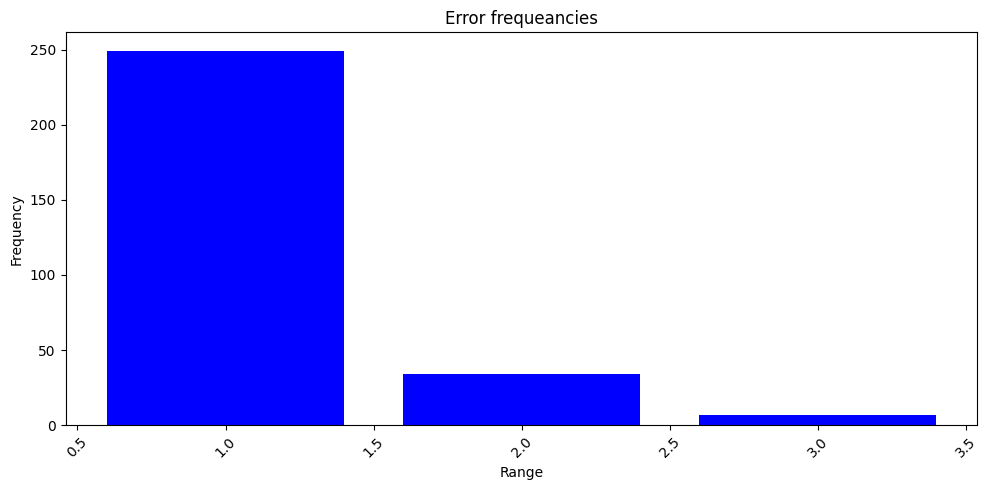

{1: 249, 2: 34, 3: 7}
Error mean: 1.1655172413793105
Error rate: 14.661274014155712 %
Overall mean: 0.01314459049544995
Accuracy: 0.7143579373104145 
 Precision: 0.7167510652409288 
 Recall: 0.7143579373104145 
 F1 Score: 0.7143663393893703
Confusion Matrix:
 [[105   0  12   0   0  29   0   0   0]
 [  0 129   0   2  24   1  18  52   0]
 [  8   0  31   0   0   2   0   0   1]
 [  0   1   0 314   3   0   0  60   0]
 [  0  44   0   2  97   9  48   3   0]
 [ 14   1   0   0  10 348  42   0   0]
 [  1   8   0   1  40  47 151   1   0]
 [  0  43   0  29   5   0   3 238   0]
 [  1   0   0   0   0   0   0   0   0]]


In [28]:
classify(X_train, X_test, y_train, y_test, RandomForestClassifier(random_state=42), classifier_name="RandomForestClassifier")

### SVM
Much higher computational cost, more distributed error, but in overall worse result

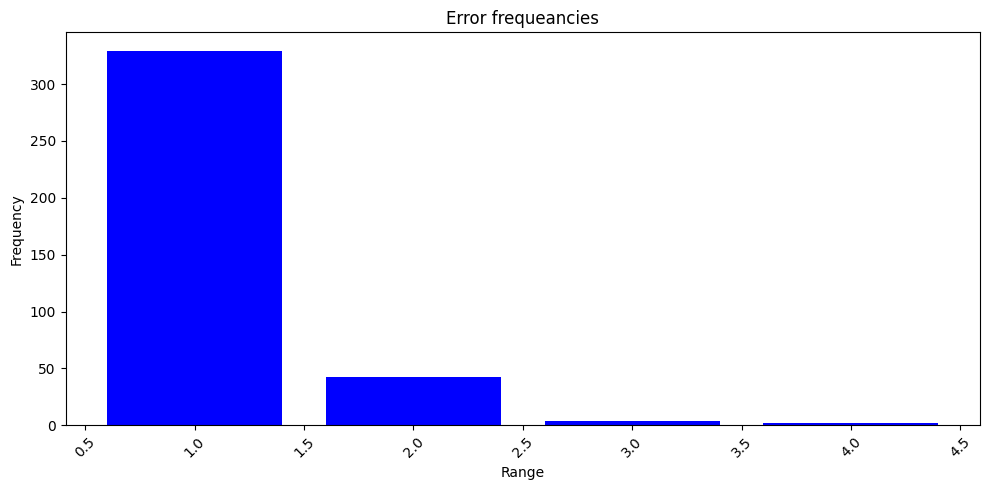

{1: 329, 2: 42, 3: 4, 4: 2}
Error mean: 1.1485411140583555
Error rate: 19.059656218402427 %
Overall mean: 0.05712841253791709
Accuracy: 0.6638018200202225 
 Precision: 0.6713742061589834 
 Recall: 0.6638018200202225 
 F1 Score: 0.6621895234418463
Confusion Matrix:
 [[109   0   9   0   0  28   0   0   0]
 [  0 103   0   1  34   1  21  66   0]
 [ 16   0  23   0   0   3   0   0   0]
 [  0   2   0 285   1   0   0  90   0]
 [  0  46   0   0  67   8  72  10   0]
 [ 30   2   0   0   3 330  50   0   0]
 [  1   7   0   1  32  52 156   0   0]
 [  0  42   0  22  10   2   2 240   0]
 [  1   0   0   0   0   0   0   0   0]]


/home/liingfeng/Desktop/tensorflow/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [29]:
classify(X_train, X_test, y_train, y_test, SVC(random_state=42), classifier_name="SVC")

### Naive bayes

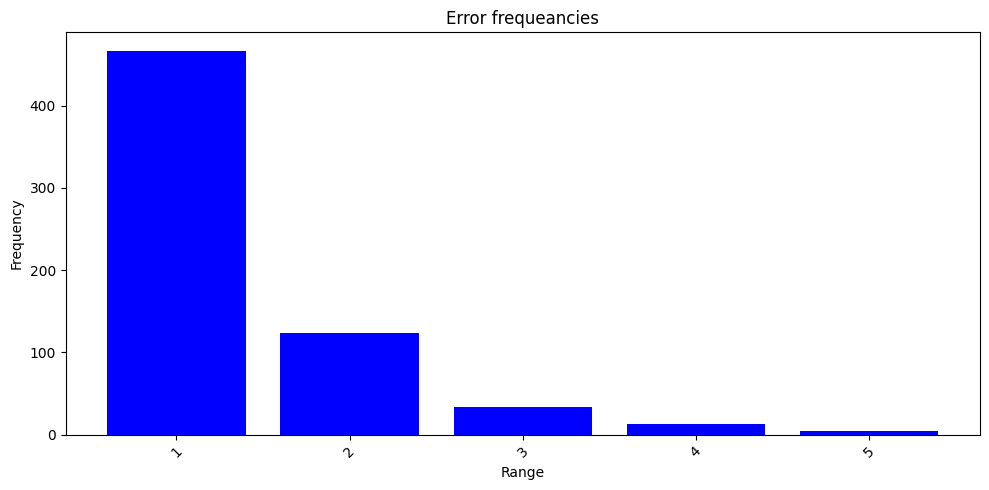

{1: 466, 2: 124, 3: 34, 4: 13, 5: 4}
Error mean: 1.3853354134165368
Error rate: 32.406471183013146 %
Overall mean: 0.2295247724974722
Accuracy: 0.487360970677452 
 Precision: 0.5779118178150073 
 Recall: 0.487360970677452 
 F1 Score: 0.4700834219688251
Confusion Matrix:
 [[ 90   0  45   0   0   8   2   0   1]
 [  1  65   4  18  88   0  43   7   0]
 [  5   0  34   0   0   0   1   0   2]
 [  0   8   0 326  19   0   6  19   0]
 [  2  18   3   4  78   2  94   2   0]
 [117   4  20   0  20 113 141   0   0]
 [ 10   1   2   0  38  13 185   0   0]
 [  0  88   0 103  40   3  11  73   0]
 [  0   0   1   0   0   0   0   0   0]]


In [30]:
classify(X_train, X_test, y_train, y_test, GaussianNB(), classifier_name="Naive bayes")

### ANN

In [31]:
encoder = OneHotEncoder(sparse_output=False)
y_encoded = encoder.fit_transform(target[['price_categ']])

# Step 2: Split the data
X_train, X_test, y_train, y_test = train_test_split(
    electric_cars_encoded, y_encoded, test_size=0.3, random_state=42
)

# Step 3: Normalize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Step 4: Define the ANN model
model = Sequential()
model.add(Dense(128, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(64, activation='tanh'))
model.add(Dense(32, activation='tanh'))
model.add(Dense(y_train.shape[1], activation='softmax'))  # Softmax for multi-class classification

# Step 5: Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Step 6: Train the model
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, batch_size=128)

/home/liingfeng/Desktop/tensorflow/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
I0000 00:00:1731765345.604678   94341 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 7458 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 3080, pci bus id: 0000:06:00.0, compute capability: 8.6


Epoch 1/100


I0000 00:00:1731765347.005312   94485 service.cc:148] XLA service 0x784cfc00b900 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1731765347.005334   94485 service.cc:156]   StreamExecutor device (0): NVIDIA GeForce RTX 3080, Compute Capability 8.6
2024-11-16 14:55:47.024810: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1731765347.094596   94485 cuda_dnn.cc:529] Loaded cuDNN version 90300
2024-11-16 14:55:47.121412: W external/local_xla/xla/service/gpu/nvptx_compiler.cc:930] The NVIDIA driver's CUDA version is 12.4 which is older than the PTX compiler version 12.5.82. Because the driver is older than the PTX compiler version, XLA is disabling parallel compilation, which may slow down compilation. You should update your NVIDIA driver or use the NVIDIA-provided CUDA forward compatibility packages.
2024-11-16 14:55:4

 2/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0898 - loss: 2.3364 

I0000 00:00:1731765349.147122   94485 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.3588 - loss: 1.7843

2024-11-16 14:55:51.080760: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_49', 12 bytes spill stores, 12 bytes spill loads



37/37 ━━━━━━━━━━━━━━━━━━━━ 5s 62ms/step - accuracy: 0.3617 - loss: 1.7765 - val_accuracy: 0.6016 - val_loss: 1.0712
Epoch 2/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7121 - loss: 0.8587 - val_accuracy: 0.6491 - val_loss: 0.9614
Epoch 3/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7863 - loss: 0.6222 - val_accuracy: 0.6431 - val_loss: 0.9424
Epoch 4/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7937 - loss: 0.5518 - val_accuracy: 0.6532 - val_loss: 0.9349
Epoch 5/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7846 - loss: 0.5320 - val_accuracy: 0.6653 - val_loss: 0.9442
Epoch 6/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8007 - loss: 0.4859 - val_accuracy: 0.6598 - val_loss: 0.9613
Epoch 7/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8145 - loss: 0.4522 - val_accuracy: 0.6648 - val_loss: 0.9578
Epoch 8/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8185 - loss: 0.4462 - val_accuracy: 0.6689 - val_loss: 0.

In [32]:
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_test_classes = np.argmax(y_test, axis=1)

62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step 


In [33]:
Evaluator.eval_classfication(y_pred=y_pred_classes, y_true=y_test_classes, binary_classification=False, classifier_name="ANN")

Accuracy: 0.6789686552072801 
 Precision: 0.6783654146607702 
 Recall: 0.6789686552072801 
 F1 Score: 0.6778600484975453
Confusion Matrix:
 [[109   0  13   0   0  23   1   0   0]
 [  0 109   0   4  34   2  17  60   0]
 [ 11   0  27   0   0   3   0   0   1]
 [  0   1   0 314   2   0   0  61   0]
 [  1  35   0   4  95   5  54   9   0]
 [ 26   1   0   0  11 331  44   2   0]
 [  1   7   0   3  48  51 138   1   0]
 [  0  36   0  50   9   0   3 220   0]
 [  1   0   0   0   0   0   0   0   0]]


## Regression

In [34]:
X_train, X_test, y_train, y_test = train_test_split(electric_cars_encoded, target['price'], test_size=0.3, random_state=42)

In [35]:
def regression(X_train, X_test, y_train, y_test , regressor, regressor_name = None) -> None:
    regressor = regressor
    regressor.fit(X_train, y_train)

    # Predicting the test set results
    y_pred = regressor.predict(X_test)
    if regressor_name != None:
        Evaluator.eval_regression(y_pred = y_pred, y_true=y_test, plot=False, n_features=X_train.shape[1], regressor_name=regressor_name)
    Evaluator.eval_regression(y_pred = y_pred, y_true=y_test, plot=False)

### Cart

In [36]:
regression(X_train, X_test, y_train, y_test , DecisionTreeRegressor(random_state=42), regressor_name="CART")

MAE: 3496.95290456931 
 MSE: 44419767.20755758 
 RMSE: 6664.815616921265 
 R2: 0.8965573184740255 
 MAPE: 9.86951539774661
Mean: 3496.95290456931
Variance: 32191087.59078185
Standard Deviation: 5673.719026421898
r2_adjusted: 1.028364241522448
MAE: 3496.95290456931 
 MSE: 44419767.20755758 
 RMSE: 6664.815616921265 
 R2: 0.8965573184740255 
 MAPE: 9.86951539774661
Mean: 3496.95290456931
Variance: 32191087.59078185
Standard Deviation: 5673.719026421898


### RandomForest

In [37]:
regression(X_train, X_test, y_train, y_test , RandomForestRegressor(random_state=42), regressor_name="RandomForest")

MAE: 2885.318700476161 
 MSE: 23721243.989519056 
 RMSE: 4870.445974396909 
 R2: 0.9447590736812717 
 MAPE: 8.319916014087916
Mean: 2885.318700476161
Variance: 15396179.98620161
Standard Deviation: 3923.796629057323
r2_adjusted: 1.0151471999073685
MAE: 2885.318700476161 
 MSE: 23721243.989519056 
 RMSE: 4870.445974396909 
 R2: 0.9447590736812717 
 MAPE: 8.319916014087916
Mean: 2885.318700476161
Variance: 15396179.98620161
Standard Deviation: 3923.796629057323


### SVM Regression

In [38]:
regression(X_train, X_test, y_train, y_test , SVR(kernel='rbf'), regressor_name="SVR")

MAE: 14754.94192576231 
 MSE: 432830136.98026246 
 RMSE: 20804.57009842459 
 R2: -0.007954629867476637 
 MAPE: 50.41673037971168
Mean: 14754.94192576231
Variance: 215121825.7476441
Standard Deviation: 14667.031933818243
r2_adjusted: 1.2763836759012483
MAE: 14754.94192576231 
 MSE: 432830136.98026246 
 RMSE: 20804.57009842459 
 R2: -0.007954629867476637 
 MAPE: 50.41673037971168
Mean: 14754.94192576231
Variance: 215121825.7476441
Standard Deviation: 14667.031933818243


### Multivariable regression

In [39]:
linear_regressor = LinearRegression()
linear_regressor.fit(X_train, y_train)

# Predicting the test set results
y_pred = linear_regressor.predict(X_test)

# Optionally, display the coefficients of the model
print("Coefficients:", linear_regressor.coef_)
print("Intercept:", linear_regressor.intercept_)

Coefficients: [-2.29380030e+03  4.89367138e+03 -1.07404113e+04 ... -1.44555724e+12
  6.17847207e+11 -1.08985470e+12]
Intercept: -69698906702989.35


In [40]:
result = pd.DataFrame({"Real": y_test, "Prediction": y_pred})
result["diff"] = result["Real"].to_numpy() - result["Prediction"].to_numpy()

In [41]:
result

,Real,Prediction,diff
idx,,,
110061,20900,2.288156e+04,-1.981562e+03
34731,26990,2.698840e+04,1.601562e+00
58032,16900,7.045795e+11,-7.045795e+11
7755,41900,4.123287e+04,6.671328e+02
152527,12990,1.049262e+04,2.497375e+03
...,...,...,...
151606,31400,2.682321e+04,4.576789e+03
134374,37380,-1.407131e+12,1.407131e+12
20786,55236,5.011882e+04,5.117180e+03


 ### ANN

### Regression

In [42]:
# Define the model
model = Sequential()

model.add(Dense(128, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='linear'))
model.add(Dense(1))


/home/liingfeng/Desktop/tensorflow/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [43]:
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

In [44]:
# Train the model
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, batch_size=128)


Epoch 1/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 3s 44ms/step - loss: 1846362368.0000 - mae: 37336.5078 - val_loss: 1803867392.0000 - val_mae: 37082.5938
Epoch 2/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1822388352.0000 - mae: 36956.6250 - val_loss: 1727296256.0000 - val_mae: 36243.1211
Epoch 3/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1637043712.0000 - mae: 35136.9570 - val_loss: 1141688448.0000 - val_mae: 29015.5781
Epoch 4/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 852597888.0000 - mae: 23978.6074 - val_loss: 146997296.0000 - val_mae: 8244.0225
Epoch 5/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 155881264.0000 - mae: 8122.5576 - val_loss: 106069520.0000 - val_mae: 6684.3398
Epoch 6/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 114568120.0000 - mae: 6640.3311 - val_loss: 87356968.0000 - val_mae: 6127.6782
Epoch 7/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 91726248.0000 - mae: 6008.5591 - val_loss: 74999736.0000 - val_mae: 5652.7002
Epoch 8/100
37/3

In [45]:
loss, mae = model.evaluate(X_test, y_test, verbose=2)
print(f"Mean Absolute Error on test set: {mae:.2f}")

62/62 - 1s - 11ms/step - loss: 28882166.0000 - mae: 3409.4875
Mean Absolute Error on test set: 3409.49


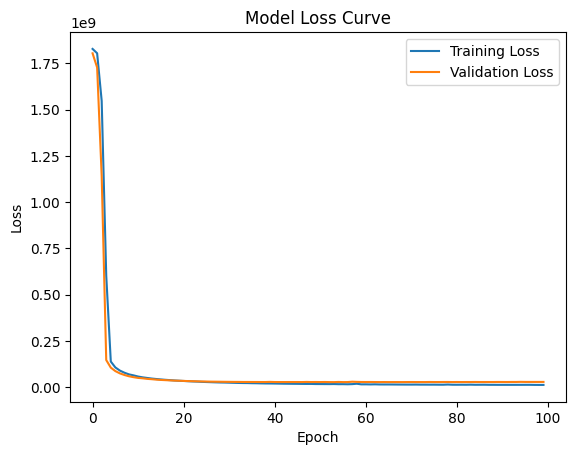

In [46]:
# Plot the loss curve
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Model Loss Curve')
plt.show()

In [47]:
y_pred = model.predict(X_test).flatten()

62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


In [48]:
Evaluator.eval_regression(y_pred=y_pred, y_true=y_test, plot=False, n_features=X_train.shape[1], regressor_name="ANN")

MAE: 3409.487834934277 
 MSE: 28882165.630901556 
 RMSE: 5374.213024332173 
 R2: 0.9327405691146851 
 MAPE: 9.86932925744204
Mean: 3409.487834934277
Variance: 17257558.334336735
Standard Deviation: 4154.221748334667
r2_adjusted: 1.0184427038641148


,bin_label,mean,variance,std_dev,max_error,min_error,n_sample
0,"(28556.74375, 0.0]",2074.685265,3.959279e+06,1989.793751,13922.357422,0.560547,763
1,"(57113.4875, 28556.74375]",3407.498887,9.557124e+06,3091.459810,19735.656250,5.757812,974
2,"(85670.23125000001, 57113.4875]",6089.912030,3.111710e+07,5578.270055,33538.312500,107.515625,173
3,"(114226.975, 85670.23125000001]",9756.194853,5.839577e+07,7641.712728,32491.609375,102.789062,51


In [49]:
Evaluator.save("electric and plug")

Regression results saved to: evaluation/electric and plug_regression.csv
Classification results saved to: evaluation/electric and plug_classification.csv
